In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
shelter_df = pd.read_csv("data/2013-2022-emergency-shelter-occupancy-machine-readable.csv", parse_dates=["Date"])
# manually add the missing value for the Brenda House 2022-04-01 capacity
shelter_df.loc[(shelter_df["Date"] == "2022-04-01") & (shelter_df["ShelterName"] == "Brendas House"), "Capacity"] = 60
shelter_df.head(3)

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\1626330343.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  shelter_df = pd.read_csv("data/2013-2022-emergency-shelter-occupancy-machine-readable.csv", parse_dates=["Date"])


,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
0,2013-04-01,Edmonton,Women Emergency,WEAC,WEAC,,75,65,,2013,4
1,2013-04-01,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,Intox Centre,70,74,,2013,4
2,2013-04-01,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,Herb Jamieson Centre,250,253,,2013,4


In [5]:
shelter_df_2019=shelter_df[shelter_df['YEAR']==2019]
shelter_df_calgary_2019=shelter_df_2019[shelter_df_2019['City']=="Calgary"]

,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
77753,2019-01-01,Calgary,Adult Emergency,River Front,Calgary Drop-In Centre,River Front,850,658,,2019,1
77754,2019-01-01,Calgary,Short Term Supportive,River Front - Short Term Supportive,Calgary Drop-In Centre,River Front - Short Term Supportive,270,179,,2019,1
77755,2019-01-01,Calgary,Adult Emergency,Hillhurst Centre,Calgary Drop-In Centre,Hillhurst Centre,125,0,,2019,1


In [8]:
shelter_df_2021=shelter_df[shelter_df['YEAR']==2021]
shelter_df_calgary_2021=shelter_df_2021[shelter_df_2021['City']=="Calgary"]

In [6]:
shelter_df_calgary_2019.head()

,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
77753,2019-01-01,Calgary,Adult Emergency,River Front,Calgary Drop-In Centre,River Front,850,658,,2019,1
77754,2019-01-01,Calgary,Short Term Supportive,River Front - Short Term Supportive,Calgary Drop-In Centre,River Front - Short Term Supportive,270,179,,2019,1
77755,2019-01-01,Calgary,Adult Emergency,Hillhurst Centre,Calgary Drop-In Centre,Hillhurst Centre,125,0,,2019,1
77756,2019-01-01,Calgary,Adult Emergency,Wagner Centre,Calgary Salvation Army,Wagner Centre (Women),12,9,,2019,1
77757,2019-01-01,Calgary,Adult Emergency,Centre of Hope,Calgary Salvation Army,Centre of Hope (Men),80,78,,2019,1


In [9]:
shelter_df_calgary_2021.head()

,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
120594,2021-01-01,Calgary,Adult Emergency,River Front,Calgary Drop-In Centre,River Front,0,0,,2021,1
120595,2021-01-01,Calgary,Short Term Supportive,River Front - Short Term Supportive,Calgary Drop-In Centre,River Front - Short Term Supportive,0,0,,2021,1
120596,2021-01-01,Calgary,Adult Emergency,Hillhurst Centre,Calgary Drop-In Centre,Hillhurst Centre,33,33,,2021,1
120597,2021-01-01,Calgary,Adult Emergency,Wagner Centre,Calgary Salvation Army,Wagner Centre (Women),12,0,,2021,1
120598,2021-01-01,Calgary,Adult Emergency,Centre of Hope,Calgary Salvation Army,Centre of Hope (Men),80,14,,2021,1


In [10]:
shelter_df_calgary_2019["Capacity"] = shelter_df_calgary_2019["Capacity"].astype("int32")
shelter_df_calgary_2021["Capacity"] = shelter_df_calgary_2021["Capacity"].astype("int32")


C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2096259432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_df_calgary_2019["Capacity"] = shelter_df_calgary_2019["Capacity"].astype("int32")
C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2096259432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_df_calgary_2021["Capacity"] = shelter_df_calgary_2021["Capacity"].astype("int32")


In [11]:
shelter_df_calgary_2019.loc[shelter_df_2019["Capacity"] == " "]
shelter_df_calgary_2019.drop(shelter_df_2019[shelter_df_2019['ShelterType'] == "DaytimeShelter"].index, inplace = True)
shelter_df_calgary_2019
shelter_df_calgary_2021.loc[shelter_df_2021["Capacity"] == " "]
shelter_df_calgary_2021.drop(shelter_df_2021[shelter_df_2021['ShelterType'] == "DaytimeShelter"].index, inplace = True)
shelter_df_calgary_2021

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\4216851956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_df_calgary_2019.drop(shelter_df_2019[shelter_df_2019['ShelterType'] == "DaytimeShelter"].index, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16212\4216851956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_df_calgary_2021.drop(shelter_df_2021[shelter_df_2021['ShelterType'] == "DaytimeShelter"].index, inplace = True)


,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
120594,2021-01-01,Calgary,Adult Emergency,River Front,Calgary Drop-In Centre,River Front,0,0,,2021,1
120595,2021-01-01,Calgary,Short Term Supportive,River Front - Short Term Supportive,Calgary Drop-In Centre,River Front - Short Term Supportive,0,0,,2021,1
120596,2021-01-01,Calgary,Adult Emergency,Hillhurst Centre,Calgary Drop-In Centre,Hillhurst Centre,33,33,,2021,1
120597,2021-01-01,Calgary,Adult Emergency,Wagner Centre,Calgary Salvation Army,Wagner Centre (Women),12,0,,2021,1
120598,2021-01-01,Calgary,Adult Emergency,Centre of Hope,Calgary Salvation Army,Centre of Hope (Men),80,14,,2021,1
...,...,...,...,...,...,...,...,...,...,...,...
158692,2021-12-31,Calgary,COVID19 Isolation Site,River Front - Isolation,Calgary Drop-In Centre,,7,0,,2021,12
158702,2021-12-31,Calgary,COVID19 Expanded Shelter,Alpha House Mustard Seed Acquisition,Alpha House,,0,0,,2021,12
158705,2021-12-31,Calgary,COVID19 Isolation Site,The Days Inn,The Alex,,90,22,,2021,12
158712,2021-12-31,Calgary,COVID19 Expanded Shelter,Alpha House Hostel,Alpha House,,0,0,,2021,12


In [12]:
shelter_df_calgary_2019["Overnight"] = shelter_df_calgary_2019["Overnight"].astype("int32")
shelter_df_calgary_2021["Overnight"] = shelter_df_calgary_2021["Overnight"].astype("int32")

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2491536741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_df_calgary_2019["Overnight"] = shelter_df_calgary_2019["Overnight"].astype("int32")
C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2491536741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_df_calgary_2021["Overnight"] = shelter_df_calgary_2021["Overnight"].astype("int32")


In [13]:
shelter_df_calgary_2019.loc[shelter_df_calgary_2019["Overnight"] == " "]
shelter_df_calgary_2021.loc[shelter_df_calgary_2021["Overnight"] == " "]

,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH


In [14]:
shelter_df_calgary_2019.dtypes
shelter_df_calgary_2021.dtypes

Date            datetime64[ns]
City                    object
ShelterType             object
ShelterName             object
Organization            object
Shelter                 object
Capacity                 int32
Overnight                int32
Daytime                 object
YEAR                     int64
MONTH                    int64
dtype: object

In [15]:
shelter_df_calgary_2021.head(3)

,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
120594,2021-01-01,Calgary,Adult Emergency,River Front,Calgary Drop-In Centre,River Front,0,0,,2021,1
120595,2021-01-01,Calgary,Short Term Supportive,River Front - Short Term Supportive,Calgary Drop-In Centre,River Front - Short Term Supportive,0,0,,2021,1
120596,2021-01-01,Calgary,Adult Emergency,Hillhurst Centre,Calgary Drop-In Centre,Hillhurst Centre,33,33,,2021,1


In [16]:
shelter_df_calgary_2019 = shelter_df_calgary_2019.groupby("ShelterName").sum(["Capacity", "Overnight"])
shelter_df_calgary_2021 = shelter_df_calgary_2021.groupby("ShelterName").sum(["Capacity", "Overnight"])

In [17]:
shelter_df_calgary_2019["occupancy_rate"] = shelter_df_calgary_2019["Overnight"] /shelter_df_calgary_2019["Capacity"]
shelter_df_calgary_2021["occupancy_rate"] = shelter_df_calgary_2021["Overnight"] /shelter_df_calgary_2021["Capacity"]

In [21]:
df_occupancyrate_2019 = shelter_df_calgary_2019[['occupancy_rate']]
df_occupancyrate_2021 = shelter_df_calgary_2021[['occupancy_rate']]

,occupancy_rate
ShelterName,
Alpha House,0.949361
Brendas House,0.639909
Calgary Dream Centre - Short Term Supportive,0.936460
Calgary YWCA,0.832325
Calgary YWCA - Short Term Supportive,0.867979
Centre of Hope,0.939281
Hillhurst Centre,0.000000
Inn From the Cold - 2nd Floor,0.151986
Inn From the Cold - 3rd Floor,0.778870


<Figure size 7200x7200 with 0 Axes>

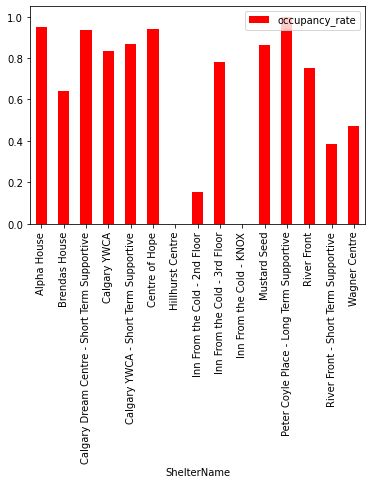

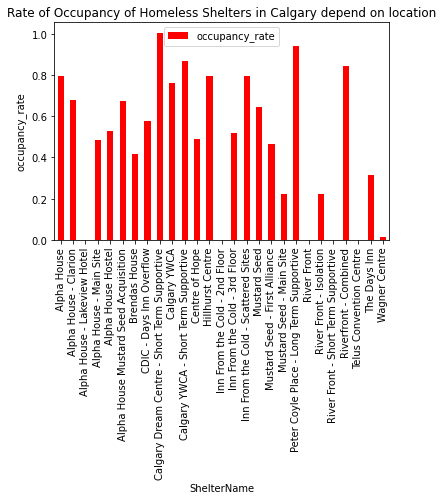

In [19]:
fig = plt.figure()
df_occupancyrate_2019.plot(kind='bar', color='r', grid=False)
df_occupancyrate_2021.plot(kind='bar', color='r', grid=False)
plt.ticklabel_format(axis='y',style='plain')
plt.legend( );
fig.set_size_inches(100,100)
plt.ylabel('occupancy_rate')
plt.title('Rate of Occupancy of Homeless Shelters in Calgary depend on location')
plt.legend()
plt.show()

In [ ]:
# for each year, find top 10 shelters by capacity

In [20]:
shelter_df_calgary=shelter_df[shelter_df['City']=="Calgary"]
shelter_df_calgary
df_overtime = shelter_df_calgary.iloc[:, [9,10,3,6,7]]
df_overtime["Capacity"] = df_overtime["Capacity"].astype("int32")
df_overtime["Overnight"] = df_overtime["Overnight"].astype("int32")
df_overtime.drop(df_overtime[df_overtime['Capacity'] == 0].index, inplace = True)
df_overtime["occupancy_rate"] =df_overtime["Overnight"] /df_overtime["Capacity"]
df_new=pd.DataFrame(df_overtime.groupby(['YEAR','MONTH','ShelterName'])['occupancy_rate'].mean())
df_new

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\372680054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overtime["Capacity"] = df_overtime["Capacity"].astype("int32")
C:\Users\HP\AppData\Local\Temp\ipykernel_16212\372680054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overtime["Overnight"] = df_overtime["Overnight"].astype("int32")
C:\Users\HP\AppData\Local\Temp\ipykernel_16212\372680054.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

occupancy_rate
YEAR MONTH ShelterName                                                 
2013 4     Alpha House                                         0.779221
           Alpha House - Winter Emergency                      0.915686
           Brendas House                                       0.953333
           Calgary Dream Centre - Short Term Supportive        0.798400
           Calgary YWCA                                        1.000000
...                                                                 ...
2022 6     Peter Coyle Place - Long Term Supportive            0.887745
           River Front - Isolation                             0.000000
           Riverfront - Combined                               0.445882
           The Days Inn                                        0.053846
           Wagner Centre                                       0.512963

[1745 rows x 1 columns]

In [ ]:
fig = plt.figure()
df_new.plot(kind='line', color='r', grid=False)
plt.ticklabel_format(by='ShelterName',axis='y',style='plain')
plt.legend( );
fig.set_size_inches(100,100)
plt.ylabel('occupancy_rate')
plt.title('Rate of Occupancy of Homeless Shelters in Calgary depend on location')
plt.legend()
plt.show()

Things to do:
* additional filtering to eliminate non-homeless shelters (emergency)
* look into the significance of winter shelters

* look into the shift between occupancy rate and temperature (days = 0, 1, 3, 7)

* create plots for 2021

* correlation coeff and regression line 